In [1]:
import csv
import numpy as np
# Nombre del archivo CSV
archivo_csv = "Difracción de electrones.csv"

# Diccionario para almacenar las listas por columna
columnas = {}

# Abrir el archivo CSV y leer los datos
with open(archivo_csv, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile,delimiter=";")
    
    # Leer la primera fila que contiene los encabezados
    encabezados = next(reader)
    
    # Inicializar listas vacías en el diccionario por cada encabezado
    for encabezado in encabezados:
        columnas[encabezado] = []

    # Leer los datos de cada fila, convertir a float y agregarlos a las listas correspondientes
    for fila in reader:
        for i, valor in enumerate(fila):
            valor_float = float(valor) if valor.strip() != "" else None
            columnas[encabezados[i]].append(valor_float)

# Imprimir las listas por columna
for encabezado, lista in columnas.items():
    print(f'Columna "{encabezado}": {lista}')

Columna "﻿V(kv)": [2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
Columna "D1(cm)": [3.2, 3.0, 2.8, 2.6, 2.4, 2.2]
Columna "D2(cm)": [5.0, 4.8, 4.6, 4.4, 4.2, 4.0]


In [2]:
A = columnas["﻿V(kv)"] # adimensional
X=[]
for i in range(len(A)):
    X.append(1/np.sqrt(A[i]))
X

[0.6324555320336759,
 0.5773502691896258,
 0.5345224838248488,
 0.5,
 0.47140452079103173,
 0.4472135954999579]

In [3]:
Y1=columnas["D1(cm)"]
print(Y1)
Y2=columnas["D2(cm)"]
print(Y2)

[3.2, 3.0, 2.8, 2.6, 2.4, 2.2]
[5.0, 4.8, 4.6, 4.4, 4.2, 4.0]


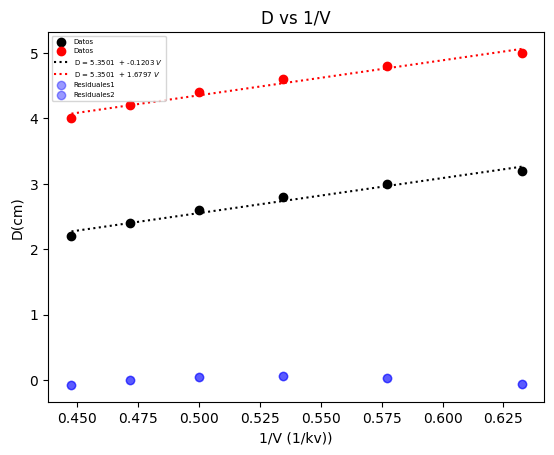

La incertidumbre en el pendiente es de 0.4086
La incertidumbre en el intercepto es de 0.2169
La incertidumbre en el pendiente es de 0.4086
La incertidumbre en el intercepto es de 0.2169


<Figure size 640x480 with 0 Axes>

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Realizar la regresión por mínimos cuadrados
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(X, Y1)
regression_line1 = [(slope1 * x) + intercept1 for x in X]
Label = "D"
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(X, Y2)
regression_line2 = [(slope2 * x) + intercept2 for x in X]
#Incertidumbre de la pendiente y de el intercepto en y

delta_m1 = std_err1
delta_b1 = std_err1 * np.sqrt(np.mean(np.array(X)**2))

delta_m2 = std_err2
delta_b2 = std_err2 * np.sqrt(np.mean(np.array(X)**2))

# Calcular los residuales
residuales1 = [y1 - ((slope1 * x) + intercept1) for x, y1 in zip(X, Y1)]
residuales2 = [y2 - ((slope2 * x) + intercept2) for x, y2 in zip(X, Y2)]

# Crear la gráfica
plt.scatter(X, Y1, label='Datos', color='black')
plt.scatter(X, Y2, label='Datos', color='red')
plt.plot(X, regression_line1, label=f'{Label} = {slope1:.4f}  + {intercept1:.4f} $V$', color='black',linestyle='dotted')
plt.plot(X, regression_line2, label=f'{Label} = {slope2:.4f}  + {intercept2:.4f} $V$', color='red',linestyle='dotted')
plt.scatter(X, residuales1, label='Residuales1', alpha=0.4, color='blue')
plt.scatter(X, residuales2, label='Residuales2', alpha=0.4, color='blue')

plt.xlabel('1/V (1/kv))')
plt.ylabel("D(cm)")
plt.title('D vs 1/V')
legend = plt.legend(fontsize="5",loc='upper left')
legend.set_frame_on(True)  # Remover el rectángulo de la leyenda

# Mostrar la gráfica
plt.show()


print(f"La incertidumbre en el pendiente es de {round(delta_m1,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b1,4)}")
print(f"La incertidumbre en el pendiente es de {round(delta_m2,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b2,4)}")
plt.savefig("DvsV.png",bbox_inches='tight')

In [5]:
def Lambda1 (D): #longitud de onda de Brag para el primer diametro
    return(2*(213*10**-12)*np.sin(0.5*np.arctan(np.radians(D/(2*0.135)))))
lambda1=[]
for i in range(len(Y1)):
    lambda1.append(Lambda1(Y1[i]))
print(lambda1)
def Lambda2 (D): # Longitud de onda de Brag para el segundo diametro
    return(2*(123*10**-12)*np.sin(0.5*np.arctan(np.radians(D/(2*0.135)))))
lambda2=[]
for i in range(len(Y2)):
    lambda2.append(Lambda2(Y2[i]))
print(lambda2)

[4.337182372933969e-11, 4.0737358467552583e-11, 3.808854794742647e-11, 3.542621297417733e-11, 3.2751200704457717e-11, 3.0064383343784884e-11]
[3.829480622354485e-11, 3.6866587133313286e-11, 3.542659223618654e-11, 3.3975136375553283e-11, 3.251255320119603e-11, 3.1039195049373685e-11]


In [9]:
from scipy import constants as cons
def d(D,V):
    return(2*0.135*cons.h/(D*np.sqrt(2*cons.e*cons.m_e)*np.sqrt(V)))
d1=[]#distancia interplanar 1
for i in range(len(X)):
    d1.append(d(Y1[i],X[i]))
d2=[]#distancia interplanar 2
for i in range(len(X)):
    d2.append(d(Y2[i],X[i]))
print(d1)
print(d2)

[1.3011882262411916e-10, 1.4526606085838037e-10, 1.6175737137067693e-10, 1.8011370128407421e-10, 2.0095415387257019e-10, 2.250737885969157e-10]
[8.327604647943627e-11, 9.079128803648774e-11, 9.846100866041205e-11, 1.0643082348604385e-10, 1.148309450700401e-10, 1.2379058372830366e-10]


In [11]:
def h(D,V,d): #calcular la constante de Planck usando las distancias interplanares
    return(d*np.sqrt(2*cons.e*cons.m_e)*D*np.sqrt(V)/(2*0.135))
h1=[]
h2=[]
for i in range(len(X)):
    h1.append(h(Y1[i],X[i],d1[i]))
for i in range(len(X)):
    h2.append(h(Y2[i],X[i],d2[i]))
print(h1)
print(h2)

[6.62607015e-34, 6.626070149999999e-34, 6.626070150000001e-34, 6.6260701500000015e-34, 6.626070149999999e-34, 6.62607015e-34]
[6.626070150000001e-34, 6.62607015e-34, 6.626070150000001e-34, 6.62607015e-34, 6.62607015e-34, 6.62607015e-34]


In [12]:
cons.h

6.62607015e-34